<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-задачи" data-toc-modified-id="Описание-задачи-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание задачи</a></span></li><li><span><a href="#Данные" data-toc-modified-id="Данные-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Данные</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Модель</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выбор модели</a></span></li><li><span><a href="#Анализ-и-обработка-данных" data-toc-modified-id="Анализ-и-обработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ и обработка данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Тестовое задание. Моделирование вкладов физических лиц

## Описание проекта

### Описание задачи

Построить и описать модель, где целевой переменной являются помесячные изменения объемов рынка вкладов физических лиц РФ в рублях, которая будет объяснима с точки зрения экономической логики. Дополнительно требуется построить прогноз таргета на 01.2017 – 12.2017

### Данные

В файле xls представлены данные по изменениям объемов вкладов физических лиц в рублях в РФ, а также ставки по продукту, связанным с ним продуктам и макроэкономические показатели. В качестве объясняющих факторов можно использовать как показатели, представленные в базе, так и самостоятельно найденные показатели (например, на сайте Росстата или ЦБ). 

### Модель

Оценивание можно проводить с помощью любых моделей (методов и алгоритмов), однако, они должны показывать, как хорошее качество с точки зрения описания взаимосвязей, так и высокую предсказательную силу на будущий период. Так же модель должна давать согласующиеся с экономической логикой зависимости.

## Загрузка данных

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from tqdm import tqdm
from IPython.display import Image
from IPython.core.display import HTML
from prophet.plot import plot_plotly, plot_components_plotly
import pandas_profiling

C:\Users\ivsha\anaconda3\envs\praktikum\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_excel('BST_DataSet.xlsx', engine='openpyxl', index_col=0, usecols='A:L', nrows=84)

In [4]:
data

Прирост вкладов физических лиц в рублях (млн руб)  \
2011-01-01                                           -79049.0   
2011-02-01                                           180475.0   
2011-03-01                                           106845.0   
2011-04-01                                           224890.0   
2011-05-01                                            45856.0   
...                                                       ...   
2017-08-01                                                NaN   
2017-09-01                                                NaN   
2017-10-01                                                NaN   
2017-11-01                                                NaN   
2017-12-01                                                NaN   

            Доходность ОФЗ по сроку до 1 года  Ключевая ставка  \
2011-01-01                           5.244667             7.75   
2011-02-01                           5.144211             8.00   
2011-03-01                           5.021364             8.00   
2011-04-01                           4.558571             8.00   
2011-05-01                           4.795000             8.25   
...                                       ...              ...   
2017-08-01                           7.882174             9.00   
2017-09-01                           7.648095             8.50   
2017-10-01                           7.503636             8.25   
2017-11-01                           7.381429             8.25   
2017-12-01                           6.978095             7.75   

            Ставка по вкладам в долларах до 1 года  \
2011-01-01                                    2.90   
2011-02-01                                    3.10   
2011-03-01                                    3.10   
2011-04-01                                    2.60   
2011-05-01                                    2.60   
...                                            ...   
2017-08-01                                    0.73   
2017-09-01                                    0.66   
2017-10-01                                    0.61   
2017-11-01                                    0.64   
2017-12-01                                    0.73   

            Ставка по вкладам в рублях до 1 года  \
2011-01-01                                  4.50   
2011-02-01                                  4.40   
2011-03-01                                  4.20   
2011-04-01                                  4.10   
2011-05-01                                  4.10   
...                                          ...   
2017-08-01                                  6.07   
2017-09-01                                  5.31   
2017-10-01                                  5.67   
2017-11-01                                  5.18   
2017-12-01                                  5.27   

            Нефть марки Юралс, долл./барр  Индекс потребительских цен, ед.  \
2011-01-01                          96.29                       106.171510   
2011-02-01                         103.96                       106.999640   
2011-03-01                         114.44                       107.663040   
2011-04-01                         123.15                       108.125990   
2011-05-01                         114.46                       108.645000   
...                                   ...                              ...   
2017-08-01                          52.00                       168.418880   
2017-09-01                          57.00                       168.166250   
2017-10-01                          57.50                       168.502590   
2017-11-01                          63.10                       168.852459   
2017-12-01                          64.90                       169.560950   

                 М0, руб       М2, руб  Курс доллара к рублю, руб  \
2011-01-01  5.532900e+06  19307.700000                      30.08   
2011-02-01  5.613700e+06  19536.700000                      29.29   
2011-03-01  5.647000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2011-01-01 to 2017-12-01
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Прирост вкладов физических лиц в рублях (млн руб)  72 non-null     float64
 1   Доходность ОФЗ по сроку до 1 года                  84 non-null     float64
 2   Ключевая ставка                                    84 non-null     float64
 3   Ставка по вкладам в долларах до 1 года             84 non-null     float64
 4   Ставка по вкладам в рублях до 1 года               84 non-null     float64
 5   Нефть марки Юралс, долл./барр                      84 non-null     float64
 6   Индекс потребительских цен, ед.                    84 non-null     float64
 7   М0, руб                                            84 non-null     float64
 8   М2, руб                                            84 non-null     float

Данные состоят из 11 столбцов и 84 строк. В столбце `Прирост вкладов физических лиц в рублях (млн руб)`, который является целевым признаком, присутствуют пропуски. Этим пропускам соотвествуют даты, на которые необходимо будет сделать прогноз. Так же можно заметить, что каждой строке соответствует своя дата, поэтому в дальнейшем будем работать с данными как с временным рядом.

In [6]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Выбор модели

Необходимо выбрать модель для обучения. Лучшим вариантом будет модель, которая будет давать наименьшую MAPE, а так как эта метрика относительная и показывает среднее процентное отклонение, то воспользуемся сторонними источниками информации. Ниже представлен график с сайта `Habr.com`.

In [5]:
Image(url= "https://habrastorage.org/r/w1560/files/491/363/dfa/491363dfa9da400686ce13018a167b7f.png")

Как видно из графика МАPE можно уверенно утверждать, что Prophet показывает наилучший результат

Теперь, когда модель выбрана, определимся с метрикой для оценки качества модели. Из таких метрик как МАЕ, MSE, RMSE, R2 наилучшим выбором будет коэффициент детерминации R2, так как эта метрика показывает насколько точно (в процентах) модель научилась предсказывать данные. Остальные метрики будут не особо информативны, так как они скорее подходят для сравнения различных моделей, но не особо хорошо показывают качество обучения конкретной. R2 должно получится не ниже 70%.

## Анализ и обработка данных

Отделим от основных данных строки с пропусками в целевом признаке.

In [6]:
target = data['2017-01-01':'2017-12-01']

In [7]:
data_rest = data[:'2016-12-01']

Построим график целевого признака.

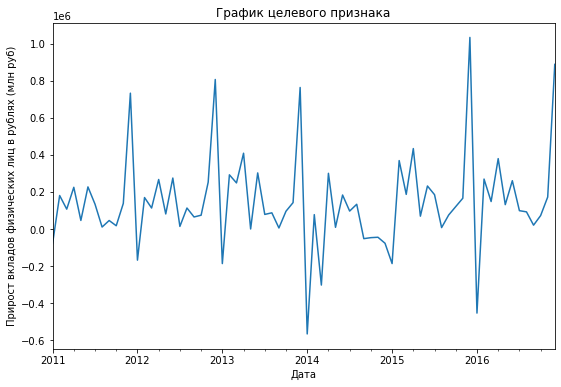

In [8]:
data_rest['Прирост вкладов физических лиц в рублях (млн руб)'].plot(figsize=(9, 6))
plt.title('График целевого признака')
plt.xlabel('Дата')
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')
plt.show()

По графику можно предположить, что в целевом признаке присутствует сезонность.

Исследуем `Прирост вкладов физических лиц` на наличие тренда и сезонности.

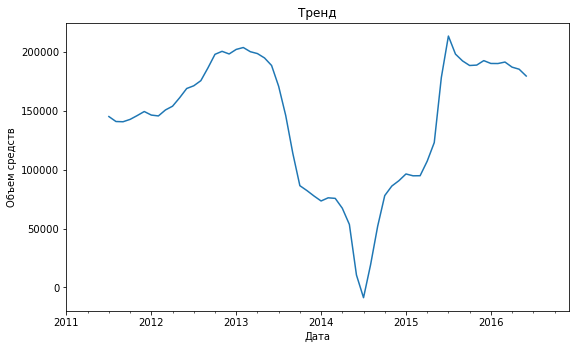

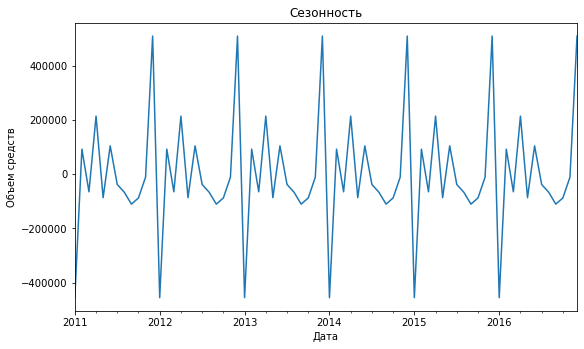

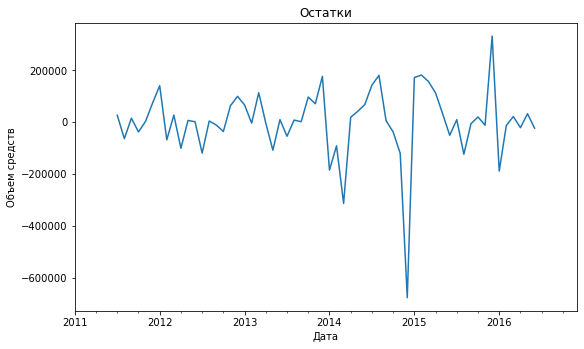

In [9]:
decomposed = seasonal_decompose(data_rest['Прирост вкладов физических лиц в рублях (млн руб)'])

plt.figure(figsize=(9, 18))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.xlabel('Дата')
plt.ylabel('Объем средств')

plt.figure(figsize=(9, 18))
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
plt.xlabel('Дата')
plt.ylabel('Объем средств')

plt.figure(figsize=(9, 18))
plt.subplot(312)
decomposed.resid.plot(ax=plt.gca())
plt.title('Остатки')
plt.xlabel('Дата')
plt.ylabel('Объем средств')

plt.show()

Предположение о наличии сезонности подтверждено. Как такового тренда не обнаружено.

Разделим датасет в соотношении 75:25 на тренировочную и валидационную выборки.

In [10]:
train, test = train_test_split(data_rest, test_size=0.25, shuffle=False)
# Перемешивание отключено, так как работаем с временными рядами

In [11]:
train.shape

(54, 11)

In [12]:
test.shape

(18, 11)

In [13]:
test.head()

Прирост вкладов физических лиц в рублях (млн руб)  \
2015-07-01                                           185049.0   
2015-08-01                                             7104.0   
2015-09-01                                            75169.0   
2015-10-01                                           120663.0   
2015-11-01                                           165837.0   

            Доходность ОФЗ по сроку до 1 года  Ключевая ставка  \
2015-07-01                          10.199130             11.5   
2015-08-01                          10.564762             11.0   
2015-09-01                          10.977727             11.0   
2015-10-01                          10.390909             11.0   
2015-11-01                          10.300000             11.0   

            Ставка по вкладам в долларах до 1 года  \
2015-07-01                                    2.20   
2015-08-01                                    1.98   
2015-09-01                                    1.90   
2015-10-01                                    1.70   
2015-11-01                                    1.65   

            Ставка по вкладам в рублях до 1 года  \
2015-07-01                                  8.74   
2015-08-01                                  8.44   
2015-09-01                                  8.45   
2015-10-01                                  6.92   
2015-11-01                                  7.45   

            Нефть марки Юралс, долл./барр  Индекс потребительских цен, ед.  \
2015-07-01                          55.87                        152.07483   
2015-08-01                          46.99                        152.60710   
2015-09-01                          47.23                        153.47696   
2015-10-01                          48.12                        154.61269   
2015-11-01                          44.42                        155.77228   

              М0, руб  М2, руб  Курс доллара к рублю, руб  \
2015-07-01  8013700.0  32094.2                      57.07   
2015-08-01  8060500.0  32383.6                      65.15   
2015-09-01  7931200.0  32074.4                      66.77   
2015-10-01  7947900.0  32170.2                      63.07   
2015-11-01  7942500.0  32754.2                      65.03   

            Номинальная средняя з/п, руб  
2015-07-01                         33901  
2015-08-01                         32176  
2015-09-01                         32911  
2015-10-01                         33357  
2015-11-01                         33347

Далее подготовим данные к обучению модели.

In [14]:
cap = 10**6
floor = -0.6*10**6

In [15]:
df = train.reset_index()
df.rename(columns = {'index': 'ds', 'Прирост вкладов физических лиц в рублях (млн руб)': 'y'}, inplace = True)
df['cap'] = cap
df['floor'] = floor

In [16]:
df_test = data_rest.reset_index().iloc[:data_rest.shape[0]]
df_test = df_test[['index', 'Прирост вкладов физических лиц в рублях (млн руб)']]
df_test.columns = ['ds', 'y']

## Обучение модели

Обучим модель Prophet. Будем подбирать такие гиперпараметры как `changepoint_prior_scale, changepoint_range, seasonality_prior_scale`.

In [17]:
r2_best = -1000
scale_best = 0
ran_best = 0
season_best = 10

for scale in tqdm(np.arange(0.01, 1.02, 0.02)):
    m = Prophet(growth='linear',
                weekly_seasonality=False,
                daily_seasonality=False,
                changepoint_prior_scale=scale)
    for col in data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
        m.add_regressor(col, mode='multiplicative', prior_scale=0.55)
    m.fit(df)
    future = m.make_future_dataframe(periods=test.shape[0], freq='MS')
    future['cap'] = cap
    future['floor'] = floor
    for col in data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
        future[col] = data_rest.reset_index()[col]

    forecast = m.predict(future)
    r2 = r2_score(df_test['y'], forecast['yhat'].iloc[:data_rest.shape[0]])
    if r2 > r2_best:
        r2_best = r2
        scale_best = scale
        
            
print('changepoint_prior_scale = {:.2f}'.format(scale_best))
print()
print('R2 = {:.4f}'.format(r2_best))

100%|██████████| 51/51 [05:48<00:00,  6.84s/it]

changepoint_prior_scale = 0.75

R2 = 0.8381


In [18]:
for ran in tqdm(np.arange(0.1, 1, 0.02)):
    m = Prophet(growth='linear',
                weekly_seasonality=False,
                daily_seasonality=False,
                changepoint_prior_scale=scale_best,
                changepoint_range=ran)
    for col in data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
        m.add_regressor(col, mode='multiplicative', prior_scale=0.55)
    m.fit(df)
    future = m.make_future_dataframe(periods=test.shape[0], freq='MS')
    future['cap'] = cap
    future['floor'] = floor
    for col in data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
        future[col] = data_rest.reset_index()[col]

    forecast = m.predict(future)
    r2 = r2_score(df_test['y'], forecast['yhat'].iloc[:data_rest.shape[0]])
    if r2 > r2_best:
        r2_best = r2
        ran_best = ran
    
print('changepoint_range = {:.2f}'.format(ran_best))
print()
print('R2 = {:.4f}'.format(r2_best))

100%|██████████| 45/45 [09:15<00:00, 12.35s/it]

changepoint_range = 0.82

R2 = 0.8574


In [19]:
for season in tqdm(np.arange(0.5, 10.1, 0.5)):
    m = Prophet(growth='linear',
                weekly_seasonality=False,
                daily_seasonality=False,
                changepoint_prior_scale=scale_best,
                changepoint_range=ran_best,
                seasonality_prior_scale=season)
    for col in data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
        m.add_regressor(col, mode='multiplicative', prior_scale=0.55)
    m.fit(df)
    future = m.make_future_dataframe(periods=test.shape[0], freq='MS')
    future['cap'] = cap
    future['floor'] = floor
    for col in data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
        future[col] = data_rest.reset_index()[col]

    forecast = m.predict(future)
    r2 = r2_score(df_test['y'], forecast['yhat'].iloc[:data_rest.shape[0]])
    if r2 > r2_best:
        r2_best = r2
        season_best = season
    
print('seasonality_prior_scale = {:.2f}'.format(season_best))
print()
print('R2 = {:.4f}'.format(r2_best))

100%|██████████| 20/20 [06:32<00:00, 19.61s/it]

seasonality_prior_scale = 8.50

R2 = 0.8608


По результатам обучения на тренировочной выборке модель показала точность предсказаний в **86.08%**.

Далее проанализируем результаты.

In [20]:
m = Prophet(growth='linear',
            weekly_seasonality=False,
            daily_seasonality=False,
            changepoint_prior_scale=scale_best,
            changepoint_range=ran_best,
            seasonality_prior_scale=season_best)
for col in data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
    m.add_regressor(col, mode='multiplicative', prior_scale=0.55)
m.fit(df)
future = m.make_future_dataframe(periods=test.shape[0], freq='MS')
future['cap'] = cap
future['floor'] = floor
for col in data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
    future[col] = data_rest.reset_index()[col]

forecast = m.predict(future)
r2 = r2_score(df_test['y'], forecast['yhat'].iloc[:data_rest.shape[0]])

In [21]:
print('R2 = {:.4f}'.format(r2))

R2 = 0.8608


In [22]:
print('MAPE: {:.2f}'.format(mean_absolute_percentage_error(df_test['y'], forecast['yhat'].iloc[:data_rest.shape[0]])))

MAPE: 4.85


Как видно МАPE получилась весьма низкой.

In [23]:
df_test.head()

ds         y
0 2011-01-01  -79049.0
1 2011-02-01  180475.0
2 2011-03-01  106845.0
3 2011-04-01  224890.0
4 2011-05-01   45856.0

Построим график целевых и прогнозируемых значений. Заливкой обозначен диапазон значений между верхней и нижней границей предсказаний.

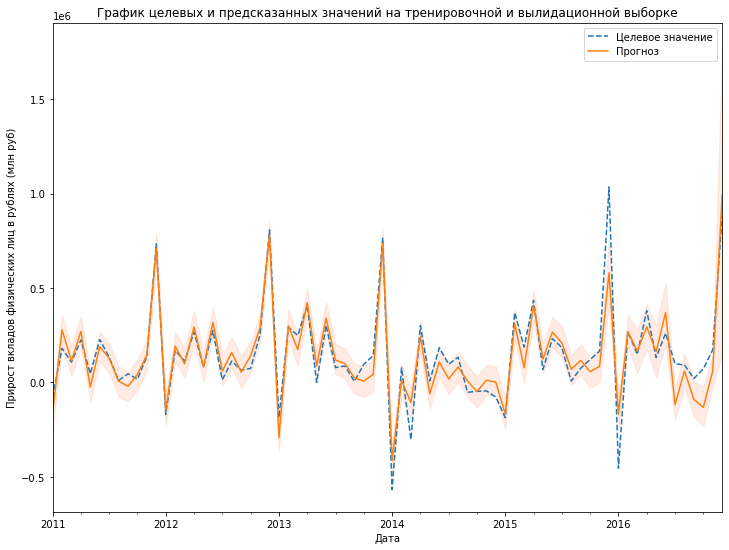

In [24]:
#f = forecast.iloc[train.shape[0]:]
f = forecast
f = f.set_index('ds')
df = df_test.set_index('ds')
ax = pd.DataFrame(df['y'], index=df_test['ds']).plot(style='--', figsize=(12, 9))
ax.fill_between(f.index, f['yhat_lower'], f['yhat_upper'], color='coral', alpha=0.15)

pd.DataFrame(f['yhat'], index=df_test['ds']).plot(style='-', ax=ax)
plt.legend(['Целевое значение', 'Прогноз'])
plt.title('График целевых и предсказанных значений на тренировочной и вылидационной выборке')
plt.xlabel('Дата')
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')
plt.show()

In [25]:
df

y
ds                  
2011-01-01  -79049.0
2011-02-01  180475.0
2011-03-01  106845.0
2011-04-01  224890.0
2011-05-01   45856.0
...              ...
2016-08-01   92168.0
2016-09-01   20272.0
2016-10-01   72037.0
2016-11-01  172323.0
2016-12-01  889085.0

[72 rows x 1 columns]

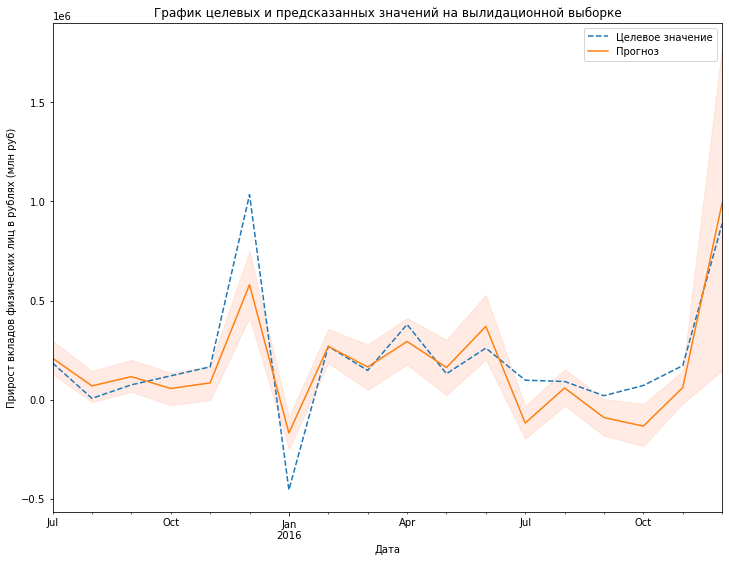

In [26]:
f = forecast.iloc[train.shape[0]:]
f = f.set_index('ds')
df = df_test.iloc[train.shape[0]:].set_index('ds')
ax = pd.DataFrame(df['y'], index=df.index).plot(style='--', figsize=(12, 9))
ax.fill_between(f.index, f['yhat_lower'], f['yhat_upper'], color='coral', alpha=0.15)

pd.DataFrame(f['yhat'], index=df_test['ds']).plot(style='-', ax=ax)
plt.legend(['Целевое значение', 'Прогноз'])
plt.title('График целевых и предсказанных значений на вылидационной выборке')
plt.xlabel('Дата')
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')
plt.xlim(['2015-07-01','2016-12-01'])
plt.show()

In [27]:
r2 = r2_score(df_test['y'].iloc[train.shape[0]:], forecast['yhat'].iloc[train.shape[0]:])
print('R2 = {:.4f}'.format(r2))

R2 = 0.7466


Видно, что модель достаточно хорошо предсказывает значения, но резкие скачки как в декабре 2015 и январе 2016 даются ей хуже. Точность модели на валидационной выборке **74.66%**. Это означает, что модель справилась с задачей.

Определим влияние признаков на целевой признак (yhat).

In [28]:
cols = list(data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns)
cols.append('yhat')

In [29]:
cols

['Доходность ОФЗ по сроку до 1 года',
 'Ключевая ставка',
 'Ставка по вкладам в долларах до 1 года',
 'Ставка по вкладам в рублях до\xa01\xa0года',
 'Нефть марки Юралс, долл./барр',
 'Индекс потребительских цен, ед.',
 'М0, руб',
 'М2, руб',
 'Курс доллара к рублю, руб',
 'Номинальная средняя з/п, руб',
 'yhat']

In [30]:
importance_linear =forecast[cols].corr()['yhat'].sort_values(ascending=True)
pd.DataFrame(importance_linear)

yhat
М0, руб                                -0.128464
М2, руб                                -0.085231
Ключевая ставка                        -0.038897
Доходность ОФЗ по сроку до 1 года       0.029601
Нефть марки Юралс, долл./барр           0.029686
Курс доллара к рублю, руб               0.033021
Индекс потребительских цен, ед.         0.041315
Ставка по вкладам в долларах до 1 года  0.043831
Ставка по вкладам в рублях до 1 года    0.051532
Номинальная средняя з/п, руб            0.373727
yhat                                    1.000000

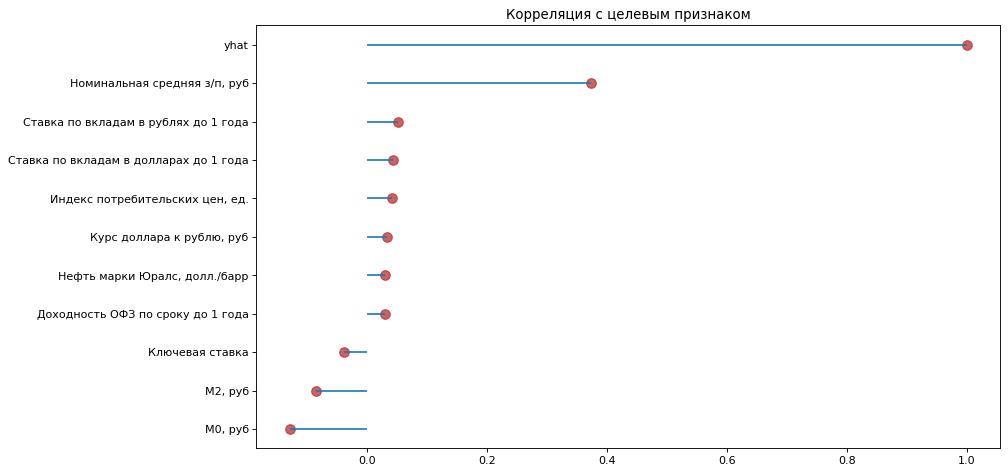

In [31]:
fig, ax = plt.subplots(figsize=(12,7), dpi= 80)
ax.hlines(y=importance_linear.index, xmin=0, xmax=importance_linear)
ax.scatter(y=importance_linear.index, x=importance_linear, s=75, color='firebrick', alpha=0.7)
plt.title('Корреляция с целевым признаком')
plt.show()

Как видно по диаграмме корреляций целевой признак (yhat) имеет среднюю **прямую** линейную зависимость с:

- Номинальная средняя з/п, руб (37%)

Остальные признаки показывают слабую линейную связь, что готорит о том, что либо ее нет, либо она не линейная.

Далее обучим модель на всех данных, чтобы предсказать значения целевого признака за 2017 год.

In [32]:
df = data_rest.reset_index()
df.rename(columns = {'index': 'ds', 'Прирост вкладов физических лиц в рублях (млн руб)': 'y'}, inplace = True)
df['cap'] = cap
df['floor'] = floor
df

ds         y  Доходность ОФЗ по сроку до 1 года  Ключевая ставка  \
0  2011-01-01  -79049.0                           5.244667             7.75   
1  2011-02-01  180475.0                           5.144211             8.00   
2  2011-03-01  106845.0                           5.021364             8.00   
3  2011-04-01  224890.0                           4.558571             8.00   
4  2011-05-01   45856.0                           4.795000             8.25   
..        ...       ...                                ...              ...   
67 2016-08-01   92168.0                           9.274348            10.50   
68 2016-09-01   20272.0                           9.015000            10.00   
69 2016-10-01   72037.0                           9.002381            10.00   
70 2016-11-01  172323.0                           8.936190            10.00   
71 2016-12-01  889085.0                           8.659545            10.00   

    Ставка по вкладам в долларах до 1 года  \
0                                     2.90   
1                                     3.10   
2                                     3.10   
3                                     2.60   
4                                     2.60   
..                                     ...   
67                                    0.89   
68                                    0.82   
69                                    0.71   
70                                    0.72   
71                                    0.76   

    Ставка по вкладам в рублях до 1 года  Нефть марки Юралс, долл./барр  \
0                                   4.50                          96.29   
1                                   4.40                         103.96   
2                                   4.20                         114.44   
3                                   4.10                         123.15   
4                                   4.10                         114.46   
..                                   ...                            ...   
67                                  6.77                          46.14   
68                                  6.00                          46.19   
69                                  6.01                          49.73   
70                                  6.62                          46.44   
71                                  6.50                          54.07   

    Индекс потребительских цен, ед.    М0, руб  М2, руб  \
0                         106.17151  5532900.0  19307.7   
1                         106.99964  5613700.0  19536.7   
2                         107.66304  5647000.0  19788.7   
3                         108.12599  5863400.0  20020.8   
4                         108.64500  5893400.0  20160.9   
..                              ...        ...      ...   
67                        163.04897  8517600.0  36169.6   
68                        163.32615  8557800.0  36148.8   
69                        164.02846  8459500.0  36051.0   
70                        164.75018  8425200.0  36433.0   
71                        165.40918  9076100.0  38418.0   

    Курс доллара к рублю, руб  Номинальная средняя з/п, руб      cap     floor  
0                       30.08                         20669  1000000 -600000.0  
1                       29.29                         20680  1000000 -600000.0  
2                       28.43                         22673  1000000 -600000.0  
3                       28.10                         22519  1000000 -600000.0  
4                       27.87                         22779  1000000 -600000.0  
..                        ...                           ...      ...       ...  
67                      64.92                         35405  1000000 -600000.0  
68                      64.60                         35843  1000000 -600000.0  
69                      62.68                         35749  1000000 -600000.0  
70                      64.36                         36195  1000000 -600000.0  
71      

In [33]:
m = Prophet(growth='linear',
            weekly_seasonality=False,
            daily_seasonality=False,
            changepoint_prior_scale=scale_best,
            changepoint_range=ran_best,
            seasonality_prior_scale=season_best)

for col in data_rest.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
    m.add_regressor(col, mode='multiplicative', prior_scale=0.55)

m.fit(df)
future = m.make_future_dataframe(periods=target.shape[0], freq='MS')
future['cap'] = cap
future['floor'] = floor

for col in data.drop('Прирост вкладов физических лиц в рублях (млн руб)', axis=1).columns:
    future[col] = data.reset_index()[col]

forecast = m.predict(future)

Получим данные за 2017 год.

In [34]:
forecast_target = forecast.loc[forecast['ds'] >= '2017-01-01'][['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index('ds')
forecast_target

yhat     yhat_lower    yhat_upper
ds                                                    
2017-01-01 -423547.037577 -508494.154359 -3.381511e+05
2017-02-01  176385.574791   91860.749727  2.612267e+05
2017-03-01  109503.359604   27437.325032  1.924550e+05
2017-04-01  349562.394577  253691.416372  4.438334e+05
2017-05-01  124028.010864   31521.951931  2.149277e+05
2017-06-01  379693.324837  276029.401564  4.760776e+05
2017-07-01  -17894.843438 -102633.495081  7.210369e+04
2017-08-01  -23053.333954 -111791.767236  6.511532e+04
2017-09-01  -23983.890004 -105322.098767  6.098553e+04
2017-10-01  -34087.411706 -117687.715560  5.737688e+04
2017-11-01   80302.497682   -4659.915378  1.665521e+05
2017-12-01  895585.189194  517066.926385  1.220880e+06

Построим график по всему целевому признаку, включая новые предсказаные значения за 2017 год.

In [35]:
df = df_test.copy()
df = df.set_index('ds')

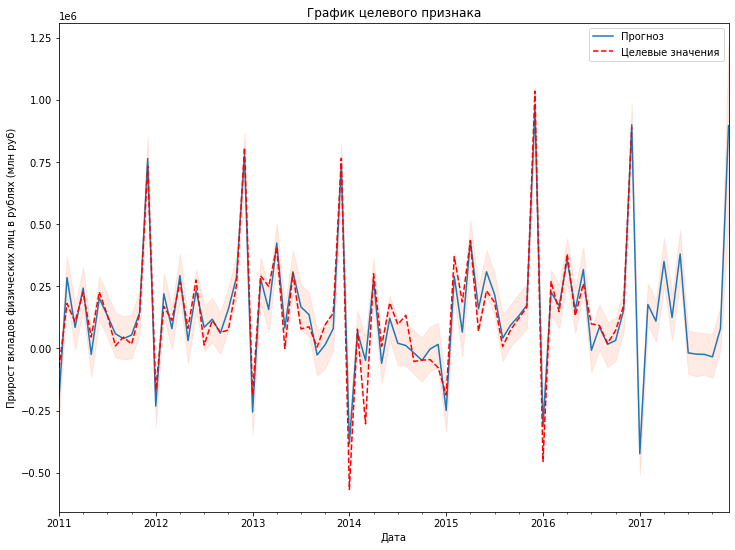

In [36]:
f = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].set_index('ds')
ax = pd.DataFrame(f['yhat']).plot(style='-', figsize=(12, 9), grid=True)
pd.DataFrame(df['y'], index=df.index).plot(style='--', figsize=(12, 9), ax=ax, color='red')
plt.fill_between(f.index, f['yhat_lower'], f['yhat_upper'], color='coral', alpha=0.15)
plt.legend(['Прогноз', 'Целевые значения'])
plt.title('График целевого признака')
plt.xlabel('Дата')
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')
plt.show()
plt.show()

In [37]:
r2 = r2_score(df['y'].iloc[:data_rest.shape[0]], forecast['yhat'].iloc[:data_rest.shape[0]])
print('R2 = {:.4f}'.format(r2))

R2 = 0.9300


Точность модели, обученной на тренировочной и валидационной выборке, получилась **93%**.

Построим график только по новым предсказаным значениям.

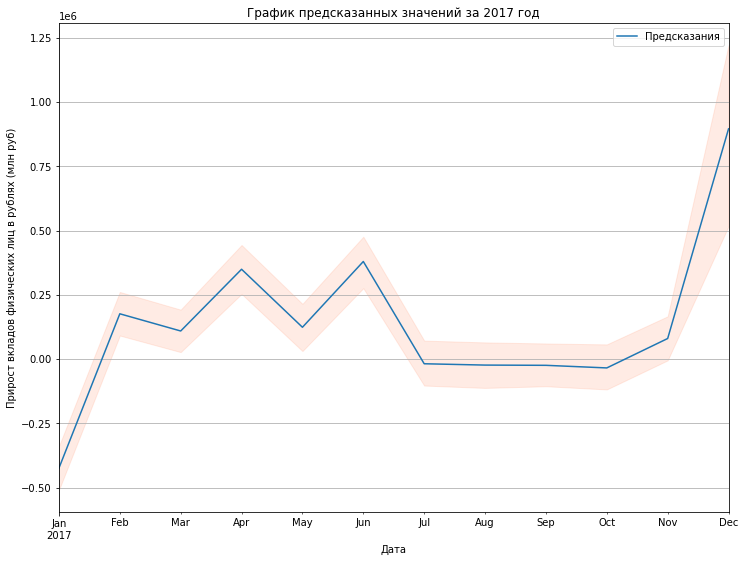

In [38]:
ax = pd.DataFrame(forecast_target['yhat']).plot(style='-', figsize=(12, 9), grid=True)
plt.fill_between(forecast_target.index, forecast_target['yhat_lower'], forecast_target['yhat_upper'], color='coral', alpha=0.15)
plt.legend(['Предсказания'])
plt.title('График предсказанных значений за 2017 год')
plt.xlabel('Дата')
plt.ylabel('Прирост вкладов физических лиц в рублях (млн руб)')
plt.show()
plt.show()

Для удобства создадим таблице только с датами и предсказаными значениями за 2017 год.

In [39]:
predictions = pd.DataFrame(forecast_target['yhat'], index=forecast_target.index)
predictions.columns = ['Прирост вкладов физических лиц в рублях (млн руб)']
predictions

Прирост вкладов физических лиц в рублях (млн руб)
ds                                                           
2017-01-01                                     -423547.037577
2017-02-01                                      176385.574791
2017-03-01                                      109503.359604
2017-04-01                                      349562.394577
2017-05-01                                      124028.010864
2017-06-01                                      379693.324837
2017-07-01                                      -17894.843438
2017-08-01                                      -23053.333954
2017-09-01                                      -23983.890004
2017-10-01                                      -34087.411706
2017-11-01                                       80302.497682
2017-12-01                                      895585.189194

## Вывод

- Данные были загружены и обработаны
- Для прогноза была выбрана модель Prophet
- В качестве метрики выбран коэффициент детерминации R2
- Данные были проанализированы. Была обнаружена годовая сезонность и слабый восходящий тренд
- Обученая модель показала качество 86.08% на тренировочной и 74.66% на валидационной выбрке, что говорит о высокой точности прогнозов
- Модель, обученная на объединенных тренировочной и валидационной выборках, показала точность 93% на всех данных
- Корреляция показала среднесильную прямую линейную зависимость целевого признака от `Номинальная средняя з/п` (37%). Остальные признаки имеют слабую линейную связь (ее либо нет, либо она не линейная)
- Был получен и выведен прогноз на 2017 год.